# Project introduction

Group: Silent Hawks

Names:- Sharva Thakur, Arijus Traykmas, Mohammad Zaid, Madhava Sai Yamike, Angelo sfyris

Our project is focusing on analyzing the crime in Chicago. The City of Chicago maintains a database of the crimes committed in Chicago since 2001. This database has one table which is crimes committed and has many different properties that we can use in our analysis. Examples include case number, date, block, IUCR code, primary type, description, location description, whether an arrest was made, etc. 

The data source is a CSV file and since this data source is around 1.7 GB so therefore we will not include it in the github repo due to file size constraints. The link will be provided in the readme. 

LINK:- https://github.com/uic-ds-spring-2023/class-project----cs-418-spring-2023-silent-hawks/blob/4b8e3a2ed706a9d78ae76b3050ed9bccddabf861/Silent%20Hawks%20Project.ipynb

# Questions to answer

What are the types of crimes being committed?
What crimes are the most common?
Where are the crimes taking place?
What areas have the most crimes being committed?
What is the distribution of the top crimes over the years?
Can we predict whether an arrest will be made based on location data?

# Any changes
We added socioeconomic data also from the City of Chicago (2008-2012). This gives us access to community area names. Besides that, everything else stayed the same.

# Data cleaning

In [1]:
# !pip install plotly==5.8.0

In [2]:
# This is to autoreload main.py every time when we edit our main.py file so 
# we don't have to restart the kernel every time and therefore load the entire dataset again.
%load_ext autoreload
%autoreload 1
%aimport main
# pip install plotly==5.8.0

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
crimes = pd.read_csv('Crimes_-_2001_to_Present.csv')

In [5]:
comAreas = pd.read_csv('communityAreas.csv')

First we start by filtering out rows where the location is null. Since we want to analyze where crimes are taking place and what areas see the most crime.

This leaves us with 7.6 million rows, which is still very close to the 7.7 million we started with so that's good. Next we'll sort the crimes based by year to get an idea of how the distribution of crime over the years looks like.

Next, we'll filter out crimes that have a primary type of null as well as this makes it harder to analyze the data later. After filtering, the amount of rows that got filtered was 0 which tells us all the crimes have a primary type associated with them which is good. That's good because we know the crimes all got tagged with at least a crime type.

Now we'll filter out any rows with an empty description as well. Description is a bit less important the primary type, but nonetheless we'll filter it out. Once again, no rows got filtered out. This is good as well as this filtering is suggesting that the data is already filtered/formatted somewhat.

We filtered out any location description with an empty description since we will need the location description to be not null to perform some location description analysis of crimes. This dropped around 6k rows.

We also will restrict the years from 2004 to 2022. The reason being data before 2004 had no location tagged, and 2023 does not have complete data yet. 

In [6]:
b_crimes = crimes
crimes = main.CrimesAfterFiltering(crimes)
crimes.head(5)

ID Case Number                    Date                Block  IUCR  \
0  10224738    HY411648  09/05/2015 01:30:00 PM      043XX S WOOD ST  0486   
1  10224739    HY411615  09/04/2015 11:30:00 AM  008XX N CENTRAL AVE  0870   
3  10224740    HY411595  09/05/2015 12:45:00 PM    035XX W BARRY AVE  2023   
4  10224741    HY411610  09/05/2015 01:00:00 PM  0000X N LARAMIE AVE  0560   
5  10224742    HY411435  09/05/2015 10:55:00 AM  082XX S LOOMIS BLVD  0610   

  Primary Type              Description Location Description  Arrest  \
0      BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   False   
1        THEFT           POCKET-PICKING              CTA BUS   False   
3    NARCOTICS    POSS: HEROIN(BRN/TAN)             SIDEWALK    True   
4      ASSAULT                   SIMPLE            APARTMENT   False   
5     BURGLARY           FORCIBLE ENTRY            RESIDENCE   False   

   Domestic  ...  Ward  Community Area  FBI Code  X Coordinate Y Coordinate  \
0      True  ...  12.0            61.0       08B     1165074.0    1875917.0   
1     False  ...  29.0            25.0        06     1138875.0    1904869.0   
3     False  ...  35.0            21.0        18     1152037.0    1920384.0   
4      True  ...  28.0            25.0       08A     1141706.0    1900086.0   
5     False  ...  21.0            71.0        05     1168430.0    1850165.0   

   Year              Updated On   Latitude  Longitude  \
0  2015  02/10/2018 03:50:01 PM  41.815117 -87.670000   
1  2015  02/10/2018 03:50:01 PM  41.895080 -87.765400   
3  2015  02/10/2018 03:50:01 PM  41.937406 -87.716650   
4  2015  02/10/2018 03:50:01 PM  41.881903 -87.755121   
5  2015  02/10/2018 03:50:01 PM  41.744379 -87.658431   

                        Location  
0  (41.815117282, -87.669999562)  
1  (41.895080471, -87.765400451)  
3  (41.937405765, -87.716649687)  
4  (41.881903443, -87.755121152)  
5  (41.744378879, -87.658430635)  

[5 rows x 22 columns]

# Exploratory data analysis

The data is all of the crimes commited over the past 20 years which will be tested by out function. The data consists of popular crimes which have taken place what were the trends over the years.

The hypothesis we are testing is that the crime in 2022 is way less than the crimes in 2004. We should be able able to see the gradual decrese in the crime rate. 

In [7]:
c = main.get_total_crimes(crimes)
main.sort_crimes(c)

cnt
Primary Type              
THEFT            1313691.0
BATTERY          1132139.0
CRIMINAL DAMAGE   709357.0
NARCOTICS         579703.0
ASSAULT           407632.0

 Here we can see that the top 5 crimes in the past 20 years and now we will see the distribution of each crime over the years.

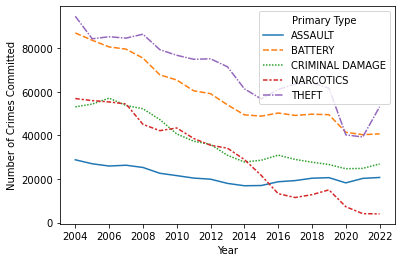

In [8]:
main.Plot_crimes_overyears(crimes)

From this data we can see the trends in the crimes. Assult:- we see that assult had the least change in the number. The graph is slightly increasing now. Battery:- We observe that the battery is significantly down. Criminal Damage:- The Critical damage have the same trend as battery as they are kind off related. Narcotics:- Narcotics has the biggest reduction but it did increase a bit during 2019 but it drops again. Theft:- The trnd in theft dropped in 2020 and 2021 but is again rising in 2022.



The intersting thing we can tell from this data we can see that the crime rate overall has decreased from what it was in the past but there is a significant decrese after covid.

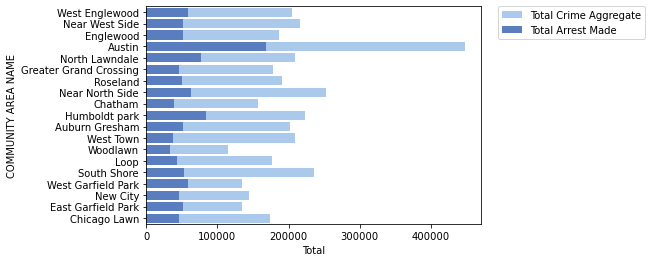

In [9]:
data = main.filterCommunityAreas(b_crimes, comAreas)
main.plotArrestsOnCA(data)

The above Horizontal bar plot depicts the locations i.e. the local community areas where the crime rate count is high compared to all other community areas of the City of Chicago from the year 2004-2023. This data visualization also takes into account the number of arrests made and compares it the total number of crimes commited in the same community area. From the graph, the highest ratio for Total Crime Aggregate to Total Arrests Made are for community areas : CHICAGO->Austin->Auburn Gresham. The lowest ratio for Total Crime Aggregate to Total Arrests Made are Burnside->Beverly->Archer Heights.
One interesting observation about the data is that we can see which the most safe to least safe areas across Chicago and notice that the ratio of total crimes to arrests made is low. This means in more than half of reported cases the arrests are not made.

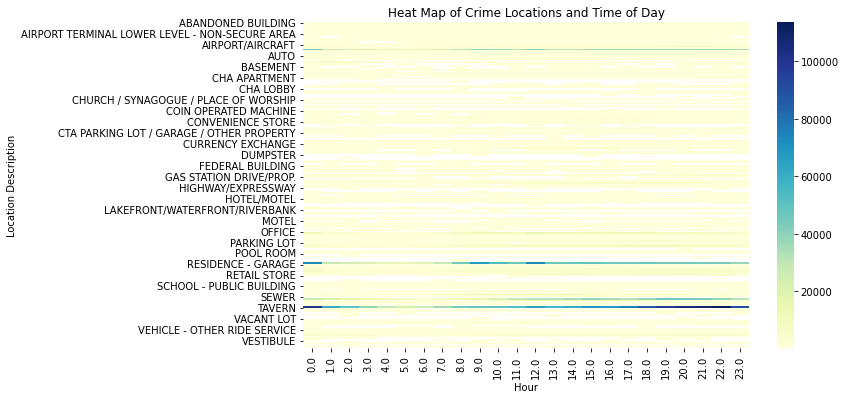

In [11]:
main.plotHeatmap(crimes)

The function plotHeatmap() takes in a DataFrame of crime data, extracts the hour of the day from the 'Date' column, groups the data by location and hour, and creates a heatmap to visualize the count of crimes that occurred for each location and hour combination. The resulting visualization can be useful for identifying patterns in crime occurrences across different locations and times of the day.

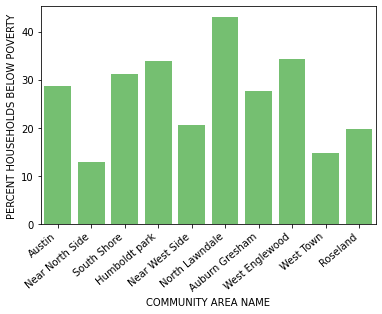

In [12]:
merged = main.socioEcon(crimes, comAreas)
main.plotBelowPovertyHouseholdRelation(merged)

The above plot above describes the relation between Below Poverty Household and community areas where the crime rate is the highest in Chicago Areas. We can see that there is consistent pattern to the percentages. This suggests that crime in the city is not targeting a certain particular area where poverty might be higher. Some areas like Near North Side have a poverty level around 10% while another area like North Lawndale has a poverty level around 42%. 

In [14]:
main.CrimesnearUIC(crimes) 

# ML analysis 
For our machine learning analysis, we are attempting to predict whether an arrest will be made based on location data. These features include the Beat, District, Ward, and Community Area.

First we will start by creating a baseline. The baseline will be to predict the mode (True/False) of all the crime data. Using the mode, we predict False for all crimes and get an accuracy of 74%.

In [15]:
main.BaselinePrediction(crimes)

0.7707334754336042

Next we used a decision tree classifier to do this job since this is a classification task whether an arrest was made (True/False). After filtering out NaN values for the features, we fit our model using a training split of 80/20. After training our model and using it on our test data we get an accuracy of around 74%.

However, this is the same accuracy as the baseline. To find out what's going on we look into the data distribution of responses to the `Arrest` column. We can see that the data is not evenly split. Therefore we must balance out the data distribution. Using sklearn parameters for the decision tree, we can specify that the classes be balanced by setting `class_weight` to `balanced`. We will also limit the depth of the tree to only 4 nodes to avoid overfitting. Using 4 nodes and balancing we reach an accuracy of 68%. This is worse than the baseline so let's increase the depth by one to see if we can improve the accuracy. That gives an accuracy of 58%, which is even worse.

In [16]:
prediction_without_balancing = main.PredictArrests(crimes)

C:\Users\sharv\anaconda3\envs\cs418env\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Accuracy: 0.7722748174195293


In [17]:
main.ArrestsMade(crimes)

cnt
Arrest        
False   142468
True     42380

In [18]:
main.PredictArrests(crimes, class_weight='balanced', max_depth=5)

C:\Users\sharv\anaconda3\envs\cs418env\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Accuracy: 0.6535569380578847


Actual  Predicted
7437599       1          1
3402945       1          1
5057187       1          1
6771661       0          0
4706198       0          1
...         ...        ...
3223803       0          1
6202900       0          0
5881915       0          1
2491743       0          0
3171135       0          0

[36970 rows x 2 columns]

Next we'll try using latitude and longitude to predict whether an arrest happened. We'll use a decision tree again this time. We'll balance our data since we know it's not balanced. We will also not restrict the depth. This gives us an accuracy of 27%. This is alot worse than our previous classifier. This tells us that predicting whether an arrest was made based on location data is alot more difficult a task than it originally seemed. This could also be due to the fact there aren't clear cut areas whether arrests are being made and where they are not and therefore could be causing the model predictions to be way off.

In [19]:
main.PredictArrestsByLocation(crimes, class_weight='balanced')

Accuracy: 0.22867189613199893


Actual  Predicted
6827283       1          1
4849629       0          1
2906882       1          1
6456414       1          1
5197327       1          1
...         ...        ...
784575        0          1
5799906       0          1
2705452       1          1
3674481       0          1
5426673       0          1

[36970 rows x 2 columns]

# Results

From the EDA analysis we can see that the crimes over the years have decreased but they started to increase after covid. From the crimes over the area we can see the the department of police can send more support in area's like Austin which was our goal to help police determine what areas are being affected and what area are not being affected. 

By combining socioeconomic data with our crime data, we discovered that crimes are not necessarily targeting certain socioeconomic areas. When we looked at the areas with the most crime and analyzed the percentage of households living below the poverty level, we found no consistent result. This could suggest that crimes are not limited to certain socioeconomic areas. 

We also were able to produce a crime map near UIC which all of the students can use to avoid going to areas which are not good. We found that is a hotspot of crimes to the southwest of campus and to the west of the campus near the medical center. We also see a hotspot to the east of the campus. We see that overall, there is little actual crime occuring on the campus grounds itself. 

From out ML analysis we can conclude that using location based data to build a predicitive model is alot harder in practice. Our ML analysis was not able to beat the baseline which we got just by predicting the mode. Neither using location codes or location coordinates to train a decision tree classifier was able to get close enough to the baseline accuracy. This probably stems from the fact that predicting crime solely on location data doesn't take into account the type of crime which would probably have a higher impact on helping a model predict whether a crime occured.